<a href="https://colab.research.google.com/github/Laureoby/movies_dataset2/blob/update/Movies2_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv('/content/drive/MyDrive/movies2.csv')
data.head()

,Movie URL,Title,Poster,Release Year,Length in Min,IMDB Rating,Rating Count,Plot,Directors,Writers,Stars,Genres
0,https://www.imdb.com/title/tt0001892/?ref_=sr_t_3,Den sorte drøm,https://m.media-amazon.com/images/M/MV5BZjg0Yj...,1911.0,53.0,5.8,265.0,Two men of high rank are both wooing the beaut...,Urban Gad|,Urban Gad|Gebhard Schätzler-Perasini|,Asta Nielsen|Valdemar Psilander|Gunnar Helseng...,Drama
1,https://www.imdb.com/title/tt0001964/?ref_=sr_t_6,Die Verräterin,https://m.media-amazon.com/images/M/MV5BNjI2Nj...,1911.0,48.0,5.9,100.0,A woman betrays the regiment location in which...,Urban Gad,Erich Zeiske|,Asta Nielsen|Max Obal|Robert Valberg,Drama
2,https://www.imdb.com/title/tt0002101/?ref_=sr_t_1,Cleopatra,https://m.media-amazon.com/images/M/MV5BZTcyMG...,1912.0,100.0,5.1,620.0,The fabled queen of Egypt's affair with Roman ...,Charles L. Gaskill|,Victorien Sardou|Charles L. Gaskill|,Helen Gardner|Pearl Sindelar|Miss Fielding,Drama|History
3,https://www.imdb.com/title/tt0002130/?ref_=sr_t_1,L'Inferno,https://m.media-amazon.com/images/M/MV5BMzY0NT...,1911.0,71.0,7.0,3500.0,Loosely adapted from Dante's Divine Comedy and...,Francesco Bertolini|Adolfo Padovan|Giuseppe de...,Dante Alighieri|,Salvatore Papa|Arturo Pirovano|Giuseppe de Lig...,Adventure|Drama|Fantasy
4,https://www.imdb.com/title/tt0002186/?ref_=sr_t_6,Den flyvende cirkus,https://m.media-amazon.com/images/M/MV5BZTljZD...,1912.0,46.0,6.4,145.0,The Flying Circus was the largest traveling ar...,Alfred Lind|,Carl Otto Dumreicher|Alfred Lind|,Rasmus Ottesen|Emilie Otterdahl|Lili Beck,Drama


In [4]:
data.duplicated().sum()

0

In [5]:
data.isnull().sum()

Movie URL           0
Title              65
Poster            307
Release Year       73
Length in Min    1958
IMDB Rating        67
Rating Count       67
Plot               65
Directors         849
Writers          7057
Stars            1352
Genres            176
dtype: int64

In [6]:
#number of rows which has many Nan values
nan_count = data.isnull().sum(axis=1)
limit = 10
rows_with_nan = nan_count[nan_count >= limit]
print(f'We have {len(rows_with_nan)} with {limit} Nan values or more')
#We delete these rows
data = data.drop(rows_with_nan.index)
print(f'The dataset has {len(nan_count)} now with {len(data)} rows')

We have 65 with 10 Nan values or more
The dataset has 126691 now with 126626 rows


In [7]:
data = data.dropna(subset=['Poster'])

In [8]:
#We use interpolation
data['Release Year'].fillna(method='ffill', inplace=True)  # Remplissage avec la valeur précédente
data.isnull().sum()

Movie URL           0
Title               0
Poster              0
Release Year        0
Length in Min    1824
IMDB Rating         2
Rating Count        2
Plot                0
Directors         760
Writers          6903
Stars            1252
Genres             93
dtype: int64

In [9]:
#We use interpolation
data['Length in Min'] = data['Length in Min'].interpolate(method='linear')
data.isnull().sum()

Movie URL           0
Title               0
Poster              0
Release Year        0
Length in Min       0
IMDB Rating         2
Rating Count        2
Plot                0
Directors         760
Writers          6903
Stars            1252
Genres             93
dtype: int64

In [10]:
#We will replace Nan values in IMDB rating and Rating count by zero
data['IMDB Rating'].fillna(0.0, inplace=True)
data['Rating Count'].fillna(0.0, inplace=True)
data.isnull().sum()

Movie URL           0
Title               0
Poster              0
Release Year        0
Length in Min       0
IMDB Rating         0
Rating Count        0
Plot                0
Directors         760
Writers          6903
Stars            1252
Genres             93
dtype: int64

In [11]:
#for Directors, Writers and Stars, we will replace Nan values by values No names or Unknown name
fill_values = {'Directors': 'Unknown Name', 'Writers': 'Unknown Name', 'Stars': 'Unknown Name'}
data.fillna(value=fill_values, inplace=True)
data.isnull().sum()

Movie URL         0
Title             0
Poster            0
Release Year      0
Length in Min     0
IMDB Rating       0
Rating Count      0
Plot              0
Directors         0
Writers           0
Stars             0
Genres           93
dtype: int64

In [12]:
#Now we work on Genres column
data['Genres'].unique()

array(['Drama', 'Drama|History', 'Adventure|Drama|Fantasy', ...,
       'Animation|Crime|Horror', 'Comedy|Music|Thriller',
       'Documentary|History|Musical'], dtype=object)

In [ ]:
data['Genres'].mode()

0    Drama
Name: Genres, dtype: object

In [13]:
mode_value = data['Genres'].mode()[0]
data['Genres'].fillna(mode_value, inplace=True)
data.isnull().sum()

Movie URL        0
Title            0
Poster           0
Release Year     0
Length in Min    0
IMDB Rating      0
Rating Count     0
Plot             0
Directors        0
Writers          0
Stars            0
Genres           0
dtype: int64

In [15]:
data.head()

,Movie URL,Title,Poster,Release Year,Length in Min,IMDB Rating,Rating Count,Plot,Directors,Writers,Stars,Genres
0,https://www.imdb.com/title/tt0001892/?ref_=sr_t_3,Den sorte drøm,https://m.media-amazon.com/images/M/MV5BZjg0Yj...,1911.0,53.0,5.8,265.0,Two men of high rank are both wooing the beaut...,Urban Gad|,Urban Gad|Gebhard Schätzler-Perasini|,Asta Nielsen|Valdemar Psilander|Gunnar Helseng...,Drama
1,https://www.imdb.com/title/tt0001964/?ref_=sr_t_6,Die Verräterin,https://m.media-amazon.com/images/M/MV5BNjI2Nj...,1911.0,48.0,5.9,100.0,A woman betrays the regiment location in which...,Urban Gad,Erich Zeiske|,Asta Nielsen|Max Obal|Robert Valberg,Drama
2,https://www.imdb.com/title/tt0002101/?ref_=sr_t_1,Cleopatra,https://m.media-amazon.com/images/M/MV5BZTcyMG...,1912.0,100.0,5.1,620.0,The fabled queen of Egypt's affair with Roman ...,Charles L. Gaskill|,Victorien Sardou|Charles L. Gaskill|,Helen Gardner|Pearl Sindelar|Miss Fielding,Drama|History
3,https://www.imdb.com/title/tt0002130/?ref_=sr_t_1,L'Inferno,https://m.media-amazon.com/images/M/MV5BMzY0NT...,1911.0,71.0,7.0,3500.0,Loosely adapted from Dante's Divine Comedy and...,Francesco Bertolini|Adolfo Padovan|Giuseppe de...,Dante Alighieri|,Salvatore Papa|Arturo Pirovano|Giuseppe de Lig...,Adventure|Drama|Fantasy
4,https://www.imdb.com/title/tt0002186/?ref_=sr_t_6,Den flyvende cirkus,https://m.media-amazon.com/images/M/MV5BZTljZD...,1912.0,46.0,6.4,145.0,The Flying Circus was the largest traveling ar...,Alfred Lind|,Carl Otto Dumreicher|Alfred Lind|,Rasmus Ottesen|Emilie Otterdahl|Lili Beck,Drama


**Data** **visualization**

1) As a film enthusiast, I want to identify the top-rated movies across different genres, so that I can discover new high-quality films to watch.

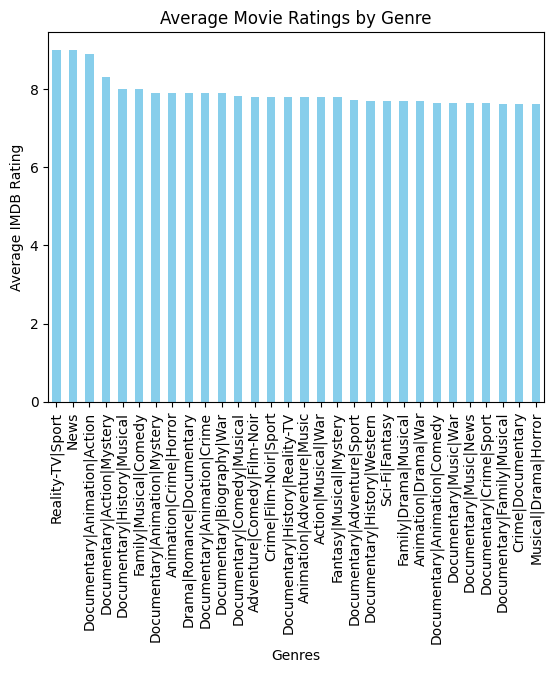

In [16]:
## Calculer la moyenne des évaluations IMDB par genre
top_movies = (data.groupby('Genres')['IMDB Rating'].mean().sort_values(ascending=False)).head(30)

# Créer un graphique en barres
top_movies.plot(kind='bar', color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Average IMDB Rating')
plt.title('Average Movie Ratings by Genre')
plt.xticks(rotation=90)  # Rotation des étiquettes pour une meilleure lisibilité
plt.show()

2) Analyze Cast and Crew Relationships: As a movie producer, I want to identify frequently collaborating actors, directors, or writers to understand successful filmmaking teams. TIP: Develop a network visualization showcasing frequent collaborators among actors, directors, and writers.

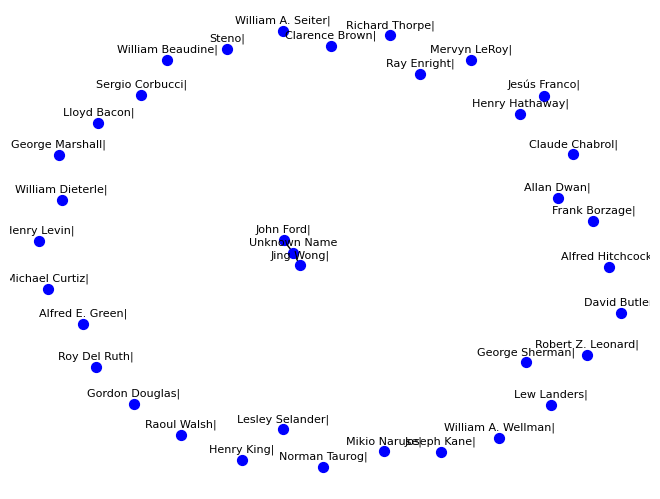

In [17]:
import networkx as nx
# Création du graphe initial
G = nx.from_pandas_edgelist(data, 'Writers', 'Directors', 'Stars', create_using=nx.Graph())
# Filtrer pour garder seulement les nœuds avec un degré élevé
degree_threshold = 40  # Exemple de seuil
filtered_nodes = [node for node, degree in dict(G.degree()).items() if degree > degree_threshold]
filtered_graph = G.subgraph(filtered_nodes)
# Utiliser un layout spring pour positionner les nœuds
pos = nx.spring_layout(filtered_graph, scale=1)
# Dessiner les nœuds
nx.draw(filtered_graph, pos, node_size=50, with_labels=False, node_color='blue', font_size=10)
# Dessiner les étiquettes décalées par rapport aux nœuds
label_pos = {key:[value[0], value[1] + 0.05] for key, value in pos.items()}  # Décaler les étiquettes un peu vers le haut
nx.draw_networkx_labels(filtered_graph, label_pos, font_size=8, font_color='black')
plt.show()

3) As a marketing manager, I want to understand how user engagement (number of ratings) changes over time and identify genres with the most engaged audiences. Acceptance criteria: Generate charts illustrating the average number of ratings per year and compare it across different genres.

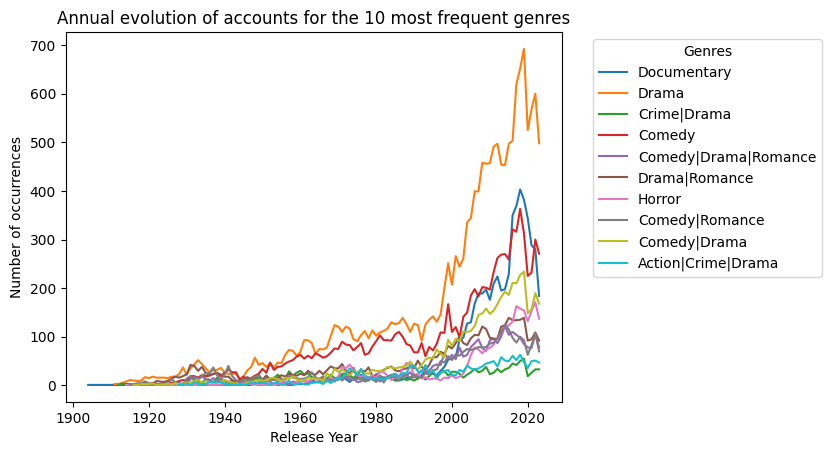

In [18]:
top_genres = data['Genres'].value_counts().head(10).index
yearly_genre_ratings = data.groupby(['Release Year', 'Genres']).size().reset_index(name='Counts')
filtered_yearly_genre_ratings = yearly_genre_ratings[yearly_genre_ratings['Genres'].isin(top_genres)]

# print diagram
sns.lineplot(data=filtered_yearly_genre_ratings, x='Release Year', y='Counts', hue='Genres', palette='tab10')

# add legend and title
plt.title("Annual evolution of accounts for the 10 most frequent genres")
plt.xlabel("Release Year")
plt.ylabel("Number of occurrences")
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')  # Position the legend outside
plt.show()

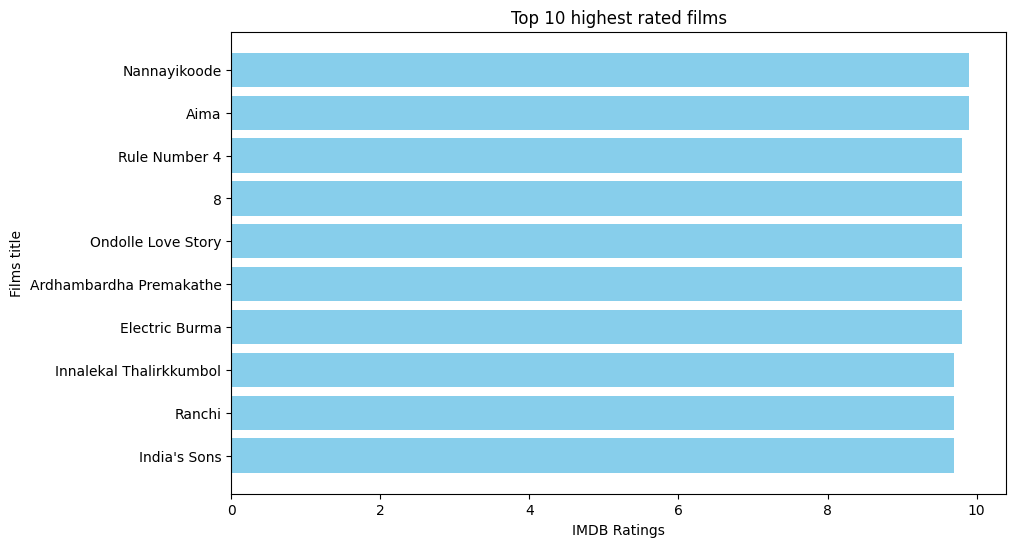

In [19]:
# Sorted Ratings
sorted_ratings = data.sort_values(by='IMDB Rating', ascending=False)

# Sélectionner le top 10 des films les mieux notés
top_films = sorted_ratings.head(10)

# Créer un diagramme à barres
plt.figure(figsize=(10, 6))
plt.barh(top_films['Title'], top_films['IMDB Rating'], color='skyblue')
plt.xlabel('IMDB Ratings')
plt.ylabel('Films title')
plt.title('Top 10 highest rated films')
plt.gca().invert_yaxis()  #Flip the y-axis to have the highest-rated movie at the top
plt.show()

In [20]:
top_films

,Movie URL,Title,Poster,Release Year,Length in Min,IMDB Rating,Rating Count,Plot,Directors,Writers,Stars,Genres
126211,https://www.imdb.com/title/tt27426876/?ref_=sr...,Nannayikoode,https://m.media-amazon.com/images/M/MV5BM2JjNT...,2023.0,116.333333,9.9,109.0,"The film is in speculative family genre, in a ...",Janet J,Janet J|,Sooraj Thelakkadu|Kannan|Arathy KB,Drama
2851,https://www.imdb.com/title/tt28999528/?ref_=sr...,Aima,https://m.media-amazon.com/images/M/MV5BODgzNT...,2023.0,98.000000,9.9,111.0,Adam and Mariyam has been kidnapped and kept i...,Rahul R Krishna|,Unknown Name,Evlin Juliet|Megha Malu Manoharan|Yunus Mohammed,Drama
2557,https://www.imdb.com/title/tt28543819/?ref_=sr...,Rule Number 4,https://m.media-amazon.com/images/M/MV5BMzEyM2...,2023.0,96.000000,9.8,132.0,"In a race against time for survival, a daring ...",Bosser,Bosser|,Shree Gopika|AK. Pratheesh Krishna,Drama
3094,https://www.imdb.com/title/tt29309987/?ref_=sr...,8,https://m.media-amazon.com/images/M/MV5BNmVjMz...,2023.0,75.000000,9.8,235.0,The death of two close friends and the police ...,Roshin A Rahman,Roshin A Rahman|,Lekshmi Devan|Vinod Guiness|Irfan Imam,Drama
125716,https://www.imdb.com/title/tt26754306/?ref_=sr...,Ondolle Love Story,https://m.media-amazon.com/images/M/MV5BY2I2YT...,2023.0,107.500000,9.8,107.0,This generation gets addicted to alcohol and d...,Praveen Sutar,Mahesh B Patil|,Niranjan Babu|Dhanushree V|Nisha Hegde,Drama|Romance
2640,https://www.imdb.com/title/tt28660608/?ref_=sr...,Ardhambardha Premakathe,https://m.media-amazon.com/images/M/MV5BMjBhOT...,2023.0,136.000000,9.8,337.0,A handsome boy and a beautiful girl end up in ...,Aravind Kaushik,Aravind Kaushik|,Abhilash M|Dwarish Abhilash|K.P. Aravind,Comedy|Romance
93191,https://www.imdb.com/title/tt11076052/?ref_=sr...,Electric Burma,https://m.media-amazon.com/images/M/MV5BZjlkMz...,2012.0,54.000000,9.8,207.0,A documentary of the concert in honor of freed...,Natalie Johns|,Unknown Name,Nazanin Afshin-Jam|Zachary Alford|Arden Altino,Documentary
3207,https://www.imdb.com/title/tt29456783/?ref_=sr...,Innalekal Thalirkkumbol,https://m.media-amazon.com/images/M/MV5BNDUwN2...,2023.0,100.000000,9.7,131.0,Add a plot in your language,Sadanandan.M.V|,Unknown Name,Joyson Jose|Sarath Krishnan|Stephy Leon,Family
93651,https://www.imdb.com/title/tt11230804/?ref_=sr...,Ranchi,https://m.media-amazon.com/images/M/MV5BZjhjZW...,2023.0,99.500000,9.7,121.0,A struggling filmmaker from Bangalore helps th...,Shashikanth Gatti|,Shashikanth Gatti|Bhat Pavan|,Prabhu Mundkur|Divya Uruduga|Tota Roy Chowdhury,Crime|Drama|Thriller
117827,https://www.imdb.com/title/tt20603460/?ref_=sr...,India's Sons,https://m.media-amazon.com/images/M/MV5BMWRmZT...,2022.0,90.000000,9.7,183.0,Add a plot in your language,Neeraj Kumar|Deepika Narayan Bhardwaj,Unknown Name,Unknown Name,Documentary


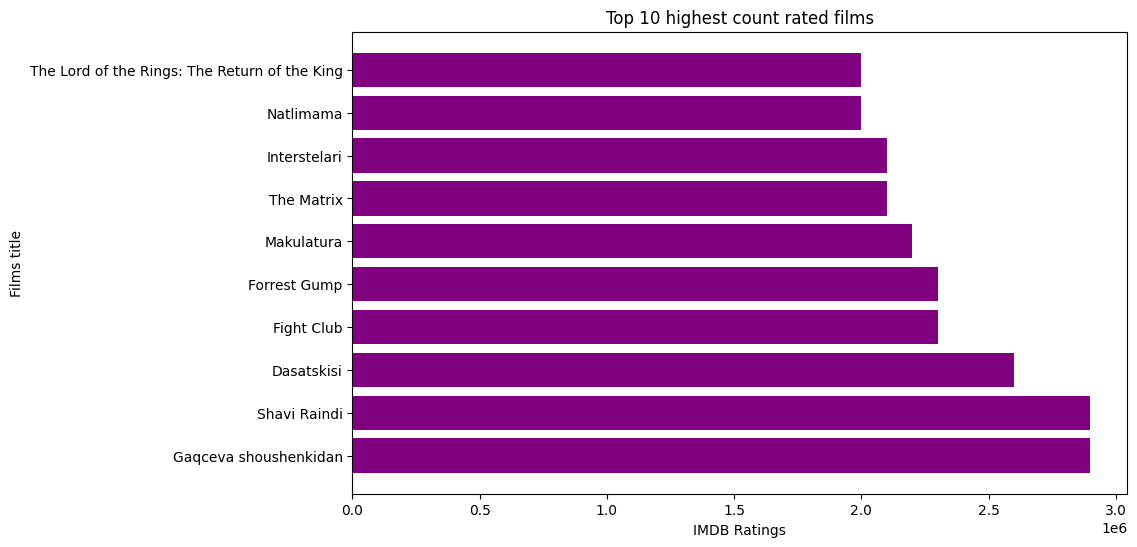

In [21]:
# Sorted Ratings: We do the same for Rating Count column
sorted_ratings_count = data.sort_values(by='Rating Count', ascending=False)

# Sélectionner le top 10 des films les mieux notés
top_films_count = sorted_ratings_count.head(10)

# Créer un diagramme à barres
plt.figure(figsize=(10, 6))
plt.barh(top_films_count['Title'], top_films_count['Rating Count'], color='purple')
plt.xlabel('IMDB Ratings')
plt.ylabel('Films title')
plt.title('Top 10 highest count rated films')
plt.show()

#**Dataset preparation**

In [22]:
data.dtypes

Movie URL         object
Title             object
Poster            object
Release Year     float64
Length in Min    float64
IMDB Rating      float64
Rating Count     float64
Plot              object
Directors         object
Writers           object
Stars             object
Genres            object
dtype: object

In [24]:
# prompt: use labelEncoder for column Movie URL, Title, Poster, Plot, Directors, Writers, Stars and Genres and I want to come back to values before encoder
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder on the categorical columns
categorical_columns = ['Movie URL', 'Title', 'Poster', 'Plot', 'Directors', 'Writers', 'Stars', 'Genres']
data[categorical_columns] = data[categorical_columns].apply(le.fit_transform)

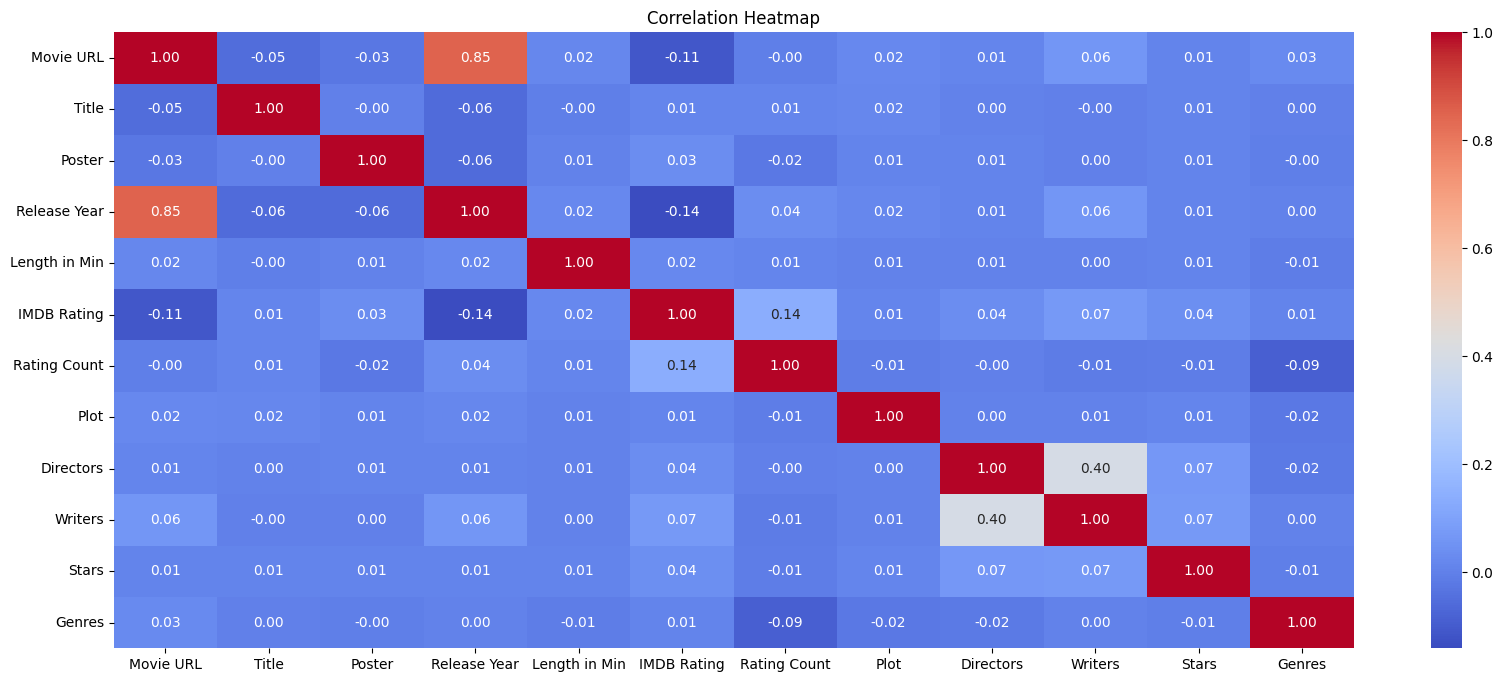

In [31]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

#Show chart
plt.show()

#**Divide into Train and test**

In [32]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = data.drop('IMDB Rating', axis=1)
y = data['IMDB Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (101107, 11)
y_train shape: (101107,)
X_test shape: (25277, 11)
y_test shape: (25277,)


In [40]:
# Example of converting a continuous variable into three bins
y_train = pd.cut(y_train, bins=3, labels=False)
y_test = pd.cut(y_test, bins=3, labels=False)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#We apply three algorith Linear regression, KNN, Decision tree
models={
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1, random_state=42),
    'GaussianNB':GaussianNB()
}

#precision function
def precision_function(Y_true, Y_pred, retu=False):
    acc=accuracy_score(Y_true, Y_pred)
    if retu:
        return acc
    else:
        print(f'Precision of model is: {acc}')

#evaluation model
def train_test_eval(models, X_train, Y_train, X_test, Y_test):
    for name, model in models.items():
        print(f'{name}:')
        model.fit(X_train, Y_train)
        precision_function(Y_test, model.predict(X_test))
        print('-'*30)

train_test_eval(models, X_train, y_train, X_test, y_test)

LogisticRegression:


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precision of model is: 0.6820825256161728
------------------------------
KNeighborsClassifier:
Precision of model is: 0.6230960952644696
------------------------------
DecisionTreeClassifier:
Precision of model is: 0.6782054832456383
------------------------------
GaussianNB:
Precision of model is: 0.6798670728330103
------------------------------


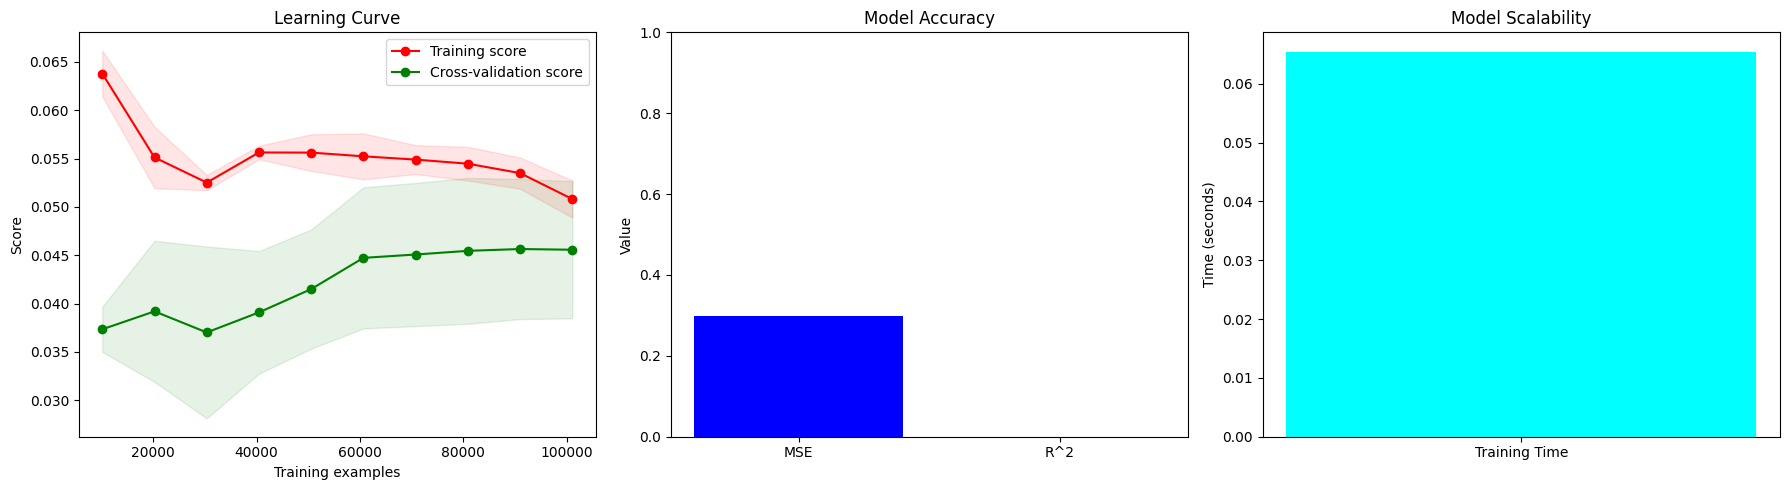

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error, r2_score
from time import time

# Créer et entraîner le modèle LinearRegression
model = LinearRegression()
start_time = time()
model.fit(X_train, y_train)
training_time = time() - start_time

# Prédictions et évaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Génération de la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Création des subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Trois figures alignées horizontalement

# Courbe d'apprentissage
axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
axes[0].set_title("Learning Curve")
axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("Score")
axes[0].legend(loc="best")

# Précision du modèle
axes[1].bar(['MSE', 'R^2'], [mse, r2], color=['blue', 'green'])
axes[1].set_title("Model Accuracy")
axes[1].set_ylim(0, 1 if r2 <= 1 else r2 + 0.1)
axes[1].set_ylabel("Value")

# Scalabilité
axes[2].bar(['Training Time'], [training_time], color='cyan')
axes[2].set_title("Model Scalability")
axes[2].set_ylabel("Time (seconds)")

plt.tight_layout()
plt.show()

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [54]:
def error(ypred, ytrue):
    e = (ypred != ytrue).mean()
    return (e)
def ConfusionmatrixPlot(Ytrue,Ypred):

    cm = metrics.confusion_matrix(Ytrue,Ypred)
    from IPython.display import Image, display

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
    for i in range(cm.shape[0]):
         for j in range(cm.shape[1]):
                ax.text(x=j, y=i,
                s=cm[i, j],
                va='center', ha='center')
    plt.xlabel('Predicted Values', )
    plt.ylabel('Actual Values')
    plt.show()
def ROCCURVE(predict,ytrue,ypred):
    fpr,tpr, thresolds=metrics.roc_curve(ytest,predict)
    roc_auc=metrics.auc(fpr,tpr)
    print("the Area under the ROC curve:%f" %roc_auc)

    #plotting the ROC curve
    plt.plot(fpr,tpr,label="AUC = %0.2f" %roc_auc)
    plt.xlabel('false Positive rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc="lower right")
    plt.title('Receiver operating characteristics')

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

In [56]:
def training(estimator,x, y,cv=None,n_jobs=1, train_sizes=np.linspace(0.01, 1.0, 5)):
    train_sizes, train_scores, test_scores,fit_times,_ = learning_curve(estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='roc_auc_ovr',shuffle=True,verbose=1,return_times=True)
    return train_sizes, train_scores, test_scores,fit_times

In [57]:
def training_svm(estimator,x, y,cv=None,n_jobs=1, train_sizes=np.linspace(0.01, 1.0, 5)):
    train_sizes, train_scores, test_scores,fit_times,_ = learning_curve(estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='roc_auc',shuffle=True,verbose=1,return_times=True)
    return train_sizes, train_scores, test_scores,fit_times

In [58]:
def plot_training(train_sizes,train_scores_mean,train_scores_std,test_scores_mean,test_scores_std,fit_times_mean,fit_times_std,title,ylim=None):
    _, axes = plt.subplots(1, 3, figsize=(20, 5))
    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1,color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    path= title
    plt.savefig(path)

    plt.show()

Learning Regression

In [74]:
title = "Learning Curves (Logistic Regression)"
cv =KFold(10,shuffle=True,random_state=28)
estimator = OneVsRestClassifier(LogisticRegression())
train_sizes,train_scores, test_scores,fit_times= training(estimator, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 5))

[learning_curve] Training set sizes: [  1137  29289  57441  85593 113745]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.3s finished


In [76]:
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)

test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

fit_times_mean = fit_times.mean(axis=1)
fit_times_std = fit_times.std(axis=1)

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

In [78]:
# Vérifier si des NaNs ou des infinis sont présents
print("NaN in X:", np.isnan(X).any())
print("Inf in X:", np.isinf(X).any())
print("NaN in y:", np.isnan(y).any())
print("Inf in y:", np.isinf(y).any())

# Remplacer les NaNs ou les valeurs infinies si nécessaire
X = np.nan_to_num(X)  # Remplace NaN et inf par des nombres (0 ou un très grand nombre)
y = np.nan_to_num(y)

NaN in X: Movie URL        False
Title            False
Poster           False
Release Year     False
Length in Min    False
Rating Count     False
Plot             False
Directors        False
Writers          False
Stars            False
Genres           False
dtype: bool
Inf in X: Movie URL        False
Title            False
Poster           False
Release Year     False
Length in Min    False
Rating Count     False
Plot             False
Directors        False
Writers          False
Stars            False
Genres           False
dtype: bool
NaN in y: False
Inf in y: False


In [79]:
train_scores_mean+train_scores_std

array([nan, nan, nan, nan, nan])

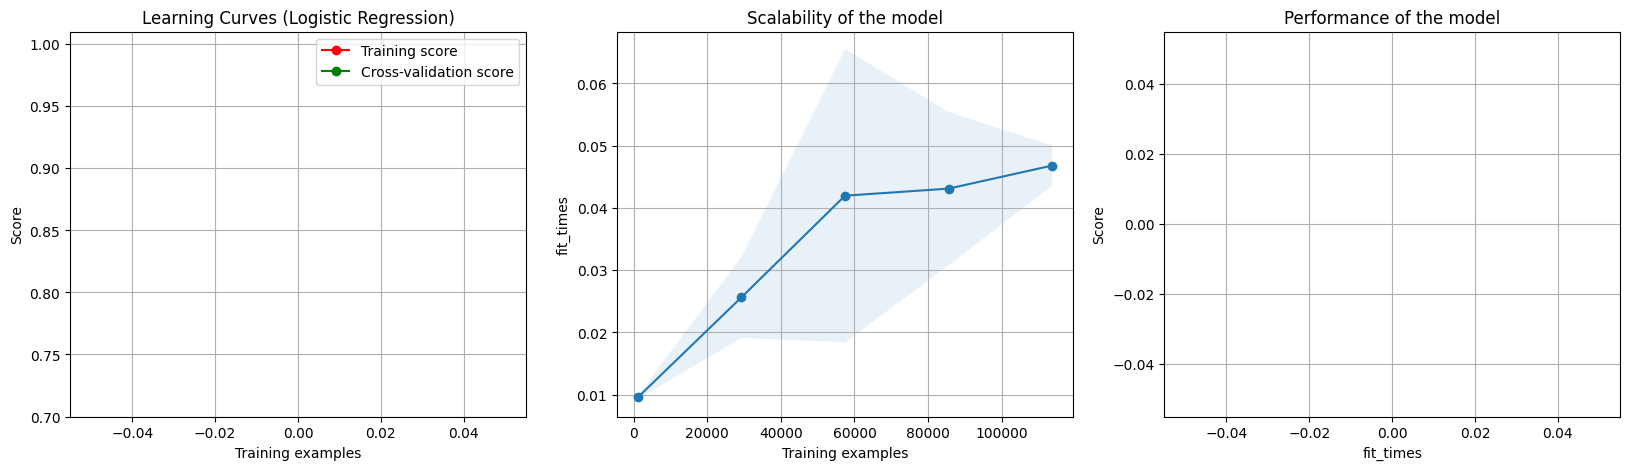

In [80]:
plot_training(train_sizes,train_scores_mean,train_scores_std,test_scores_mean,test_scores_std,fit_times_mean,fit_times_std,title,ylim=(0.7, 1.01))

Gaussian Naive Bayes

In [82]:
title1 = "Learning Curves (Gaussian Naive Bayes)"
cv1 =KFold(10,shuffle=True,random_state=28)
estimator1 = OneVsRestClassifier(GaussianNB())
train_sizes1, train_scores1, test_scores1,fit_times1= training(estimator1, X, y, cv=cv1, n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 5))

[learning_curve] Training set sizes: [  1137  29289  57441  85593 113745]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.2s finished


In [83]:
train_scores_mean1 = train_scores1.mean(axis=1)
train_scores_std1 = train_scores1.std(axis=1)

test_scores_mean1 = test_scores1.mean(axis=1)
test_scores_std1= test_scores1.std(axis=1)

fit_times_mean1 = fit_times1.mean(axis=1)
fit_times_std1 = fit_times1.std(axis=1)

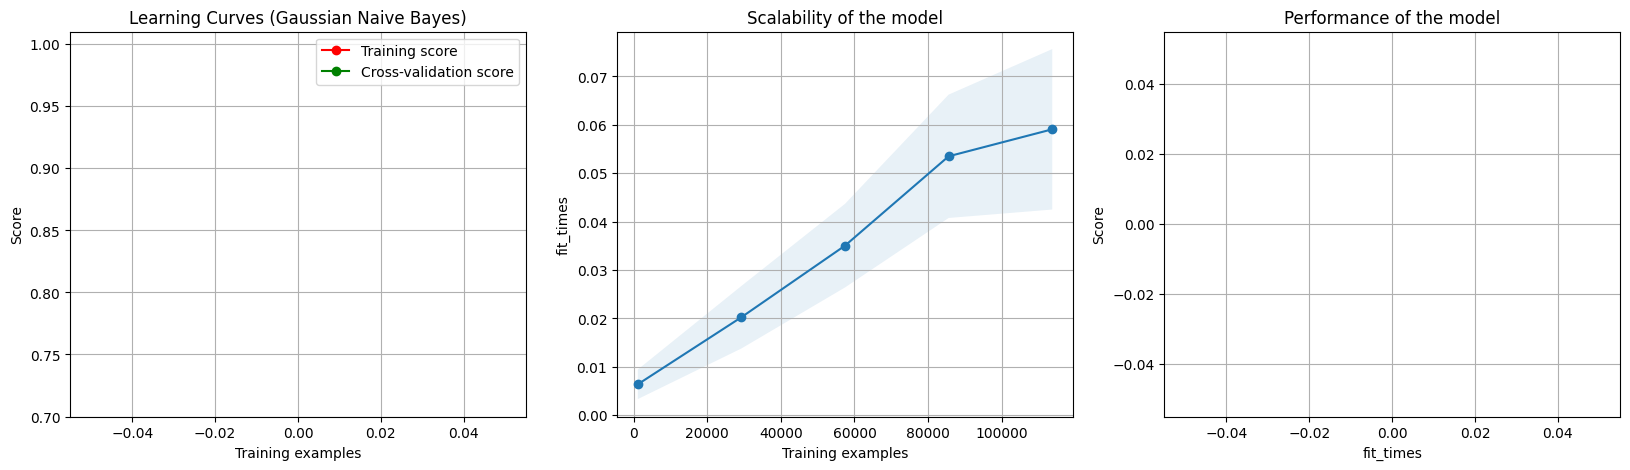

In [84]:
plot_training(train_sizes1,train_scores_mean1,train_scores_std1,test_scores_mean1,test_scores_std1,fit_times_mean1,fit_times_std1,title1,ylim=(0.7, 1.01))